In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE LANE DETECTION

In [9]:
image = cv2.imread('/home/hp/Documents/vs_code/deep_learning/Projects/Lane_detection/test_image.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny_img = cv2.Canny(blur, 50, 150)
cv2.imshow('gray',gray)
cv2.waitKey(5000)
cv2.destroyAllWindows()

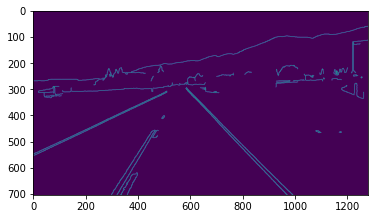

In [10]:
plt.imshow(canny_img)
plt.show()

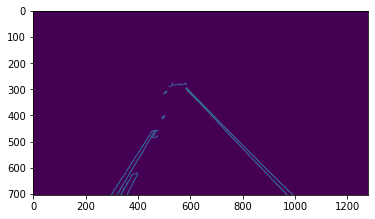

In [11]:
height = canny_img.shape[0]
polygons = np.array([[(200, height), (1100, height), (550, 250)]])
mask = np.zeros_like(canny_img)
cv2.fillPoly(mask, polygons, 255)
cropped_img = cv2.bitwise_and(canny_img, mask)
lines = cv2.HoughLinesP(cropped_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
plt.imshow(cropped_img)

VIDEO LANE DETECTION

In [12]:
cap=cv2.VideoCapture('/home/hp/Documents/vs_code/deep_learning/Projects/Lane_detection/Lane.mp4')
while True:
    success,frame=cap.read()
    cv2.imshow('orginal',frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [13]:
cap=cv2.VideoCapture('/home/hp/Documents/vs_code/deep_learning/Projects/Lane_detection/Lane.mp4')

In [14]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        # slicing ht,wd.
        height,width= frame.shape[:2]
        # (ROI) vertices
        roi_vertices = np.array([[(200, height), (width/2, height/1.37), (width-300, height)]], np.int32)
        # Converting image to grayscale
        gray_img = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # edges of objects in image is detected
        edges = cv2.Canny(gray_img, 50, 100)

        # Mask image to keep only ROI
        mask = np.zeros_like(edges)
        cv2.fillPoly(mask, roi_vertices, 255)
        masked_image = cv2.bitwise_and(edges, mask)

        # Using of HoughLinesP to detect lines in image
        lines = cv2.HoughLinesP(masked_image, rho=2, theta=np.pi/180, threshold=50, minLineLength=10, maxLineGap=30)
        # Drawing lines on blank image
        blank_img = np.zeros((height, width, 3), np.uint8)
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Overlay blank image with lines on original image
        output_img = cv2.addWeighted(frame, 0.8, blank_img, 1, 0.0)
        cv2.imshow('Lanes Detection', output_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()